# Visualisation of virtual world geometry

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from os import getcwd

%matplotlib inline

In [3]:
def myAxisTheme(myax):
    myax.get_xaxis().tick_bottom()
    myax.get_yaxis().tick_left()
    myax.spines['top'].set_visible(False)
    myax.spines['right'].set_visible(False)

In [4]:
# functions for computing angular size
def angularLMwidth (x,LMwidth):
    if x[0]:
        return 180/np.pi * 2*np.arctan((LMwidth/2.0)/x)
    else:
        return np.hstack((np.nan,180/np.pi * 2*np.arctan((LMwidth/2.0)/x[1:])))

def angularLMheight (x,LMheight):
    if x[0]:
        return 180/np.pi * np.arctan((LMheight)/x)
    else:
        return np.hstack((np.nan,180/np.pi * np.arctan((LMheight)/x[1:])))

## (1) 1D plots as function of distance
### Visualisation of how landmark size and fog affect landmark visibility in the VR

#### Landmark size and fog parameter

In [5]:
# Set landmark dimensions in mm
LMwidth = 10
LMheight = 40

# Set maximum and minimum landmark distances to be cosidered (mm)
minDist = 0
maxDist = 80

# Set virtual fog parameter (minumum bound and upper bound)
minFog = 55
maxFog = 70

# Display size (pixels)
screenWidth = 720
screenHeight = 1280

In [6]:
nPts = 1 # number of points per mm
distRange = np.linspace(minDist,maxDist,(maxDist-minDist+1)*nPts)

In [7]:
# Visibility through virtual fog
maxVis = float(max(maxFog, maxDist))
maxVisFog = float(min(maxFog, maxDist))

visibility = np.concatenate((100.0*np.ones((minFog-minDist)*nPts),
                             100.0 - np.linspace(0,int(100.0*((maxVisFog-minFog)/(maxFog-minFog))),int((maxVisFog-minFog+1)*nPts)),
                             0*np.ones(int(maxVis-maxVisFog)*nPts)))

In [8]:
# Size of landmark
alphaWidth = angularLMwidth(distRange,LMwidth)
alphaHeight = angularLMheight(distRange,LMheight)

In [9]:
print(alphaWidth[np.where(distRange==minFog)[0]])
print(alphaHeight[np.where(distRange==minFog)[0]])

[ 10.38885782]
[ 36.02737339]


In [10]:
print(alphaWidth[np.where(distRange==maxFog)[0]])
print(alphaHeight[np.where(distRange==maxFog)[0]])

[ 8.17123356]
[ 29.7448813]


#### Visualisation in 1D plot

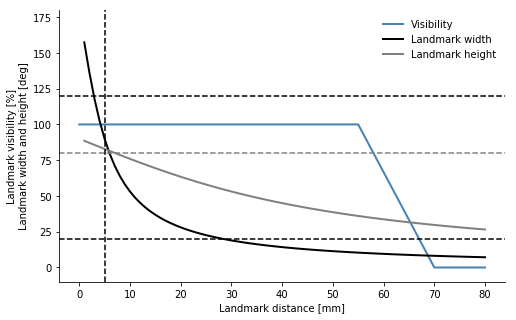

In [11]:
LMappearanceFig = plt.figure(figsize=(8,5))
LMappearancePlot = LMappearanceFig.add_subplot(111)

LMappearancePlot.plot(distRange, visibility, color='steelblue', linewidth=2)
LMappearancePlot.plot(distRange,alphaWidth, color='black', linewidth= 2)
LMappearancePlot.plot(distRange,alphaHeight, color='grey', linewidth= 2)

LMappearancePlot.axhline(y=20,linestyle='dashed',color='black')
LMappearancePlot.axhline(y=80,linestyle='dashed',color='grey')
LMappearancePlot.axhline(y=120,linestyle='dashed',color='black')

LMappearancePlot.axvline(x=LMwidth/2,linestyle='dashed',color='black')

LMappearancePlot.set_ylim(-10,180)
LMappearancePlot.set_xlabel('Landmark distance [mm]')
LMappearancePlot.set_ylabel('Landmark visibility [%]\nLandmark width and height [deg]')
leg = LMappearancePlot.legend(['Visibility', 'Landmark width','Landmark height'])
leg.get_frame().set_linewidth(0.0)
myAxisTheme(LMappearancePlot)

### Add reinforcement...

In [12]:
maxR = 50 # maximum reinforcement level
blR = 10  # baseline reinforcement level
rR = 40   # reinforcement zone size

In [13]:
# Profile of reinforcement level 
maxrR = float(min(rR, maxDist))

profileR = np.concatenate((maxR - np.linspace(0,maxR*(maxrR/rR)-blR,int((maxrR+1)*nPts)),
                           blR*np.ones((maxDist-rR)*nPts)))

#profileR[np.where(distRange==LMwidth/2)[0]]

#### Visualisation of reinforcement, fog and landmark size in 1D plot

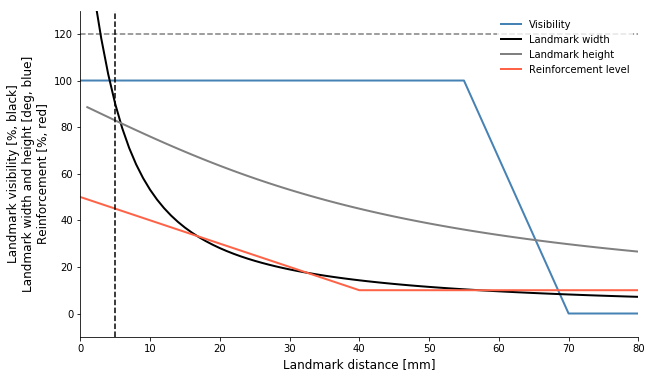

In [14]:
LMappearanceFig = plt.figure(figsize=(10,6))
LMappearancePlot = LMappearanceFig.add_subplot(111)

LMappearancePlot.plot(distRange, visibility, color='steelblue', linewidth=2)
LMappearancePlot.plot(distRange,alphaWidth, color='black', linewidth= 2)
LMappearancePlot.plot(distRange,alphaHeight, color='grey', linewidth= 2)
LMappearancePlot.plot(distRange,profileR, color='tomato', linewidth= 2)

# screen cut-offs
#LMappearancePlot.axhline(y=80,linestyle='dashed',color='grey', alpha=0.5) # height
LMappearancePlot.axhline(y=120,linestyle='dashed',color='black', alpha=0.5) # azimuth

# surface of landmark
LMappearancePlot.axvline(x=LMwidth/2,linestyle='dashed',color='black')

LMappearancePlot.set_xlim(0,maxDist)
LMappearancePlot.set_ylim(-10,130)
LMappearancePlot.set_xlabel('Landmark distance [mm]', fontsize=12)
LMappearancePlot.set_ylabel('Landmark visibility [%, black]\nLandmark width and height [deg, blue]\n\
Reinforcement [%, red]', fontsize=12)
leg = LMappearancePlot.legend(['Visibility', 'Landmark width','Landmark height','Reinforcement level'])
leg.get_frame().set_linewidth(0.0)
myAxisTheme(LMappearancePlot)

## Visualisation on world with 2 landmarks

#### World parameter

In [16]:
LMs = {
    'cone': (10, 40), #width, height
    'cylinder': (8, 30)
}

tetherObject = 'cone' # reference object 0 - cone, 1 - cylinder
tetherObjectInd = list(LMs.keys()).index(tetherObject)

LMDist = 60 # shortest distance between cone and cylinder

# Set maximum and minimum landmark distances to be cosidered (mm)
minDist = 0
maxDist = LMDist

# Set virtual fog parameter (minumum bound and upper bound)
minFog = 30
maxFog = 45

# Reinforcement
peakR = (0, 50) # peak reinforcement level, assumed at center of landmark (cone, cylinder)
blR = 10  # baseline reinforcement level
rR = 25   # reinforcement zone radius


In [17]:
nPts = 1 # number of points per mm
distRange = np.linspace(minDist,maxDist,int((maxDist-minDist+1)*nPts))

In [18]:
# Size of landmarks
LMsize = np.zeros((2,2,len(distRange)))
for i in range(2): # LM
    LMsize[i,0,:] = angularLMwidth(distRange,LMs[list(LMs.keys())[i]][0])
    LMsize[i,1,:] = angularLMheight(distRange,LMs[list(LMs.keys())[i]][1])

In [19]:
# Visibility through virtual fog
maxVis = float(max(maxFog, maxDist))
maxVisFog = float(min(maxFog, maxDist))

visibility = np.concatenate((100.0*np.ones((minFog-minDist)*nPts),
                             100.0 - np.linspace(0,int(100.0*((maxVisFog-minFog)/(maxFog-minFog))),int((maxVisFog-minFog+1)*nPts)),
                             0*np.ones(int(maxVis-maxVisFog)*nPts)))


In [20]:
# Profile of reinforcement level 
maxrR = float(min(rR, maxDist))

maxR = peakR[tetherObjectInd]

profileR = np.concatenate((peakR[tetherObjectInd] - 
                           np.linspace(0,peakR[tetherObjectInd]*(maxrR/rR)-blR,int((maxrR+1)*nPts)),
                           blR*np.ones((maxDist-2*rR)*nPts),
                           np.linspace(blR,peakR[(tetherObjectInd+1)%len(peakR)]*(maxrR/rR)-blR,int((maxrR)*nPts))
                          ))

#### 1D visualisation using radial distance relative to tether LM (r)

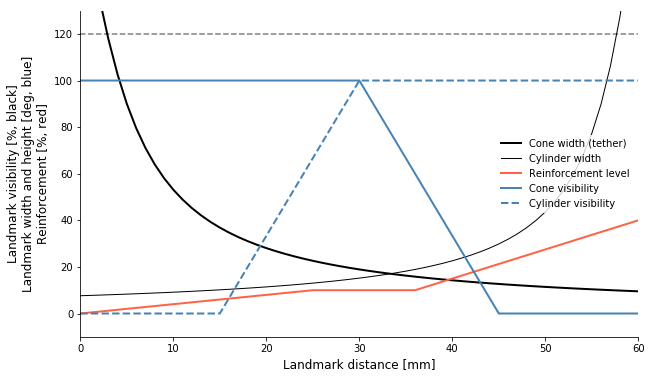

In [21]:
LMappearanceFig = plt.figure(figsize=(10,6))
LMappearancePlot = LMappearanceFig.add_subplot(111)

for LMind, LM in enumerate(list(LMs.keys())):
    if LM == tetherObject:
        LMappearancePlot.plot(distRange,LMsize[LMind,0,:], color='black', linewidth=2)
        #LMappearancePlot.plot(distRange,LMsize[LMind,1,:], color='grey', linewidth=2)
    else:
        LMappearancePlot.plot(distRange,LMsize[LMind,0,::-1], color='black', linewidth=1)
        #LMappearancePlot.plot(distRange,LMsize[LMind,1,::-1], color='grey', linewidth=1)   
LMappearancePlot.plot(distRange,profileR, color='tomato', linewidth=2)

LMappearancePlot.plot(distRange, visibility, color='steelblue', linewidth=2)
LMappearancePlot.plot(distRange, visibility[::-1], color='steelblue', linewidth=2, linestyle='dashed')

# screen cut-off
LMappearancePlot.axhline(y=120,linestyle='dashed',color='black', alpha=0.5) # azimuth

LMappearancePlot.set_xlim(0,maxDist)
LMappearancePlot.set_ylim(-10,130)
LMappearancePlot.set_xlabel('Landmark distance [mm]', fontsize=12)
LMappearancePlot.set_ylabel('Landmark visibility [%, black]\nLandmark width and height [deg, blue]\n\
Reinforcement [%, red]', fontsize=12)
leg = LMappearancePlot.legend(['Cone width (tether)', 'Cylinder width','Reinforcement level','Cone visibility','Cylinder visibility'])
leg.get_frame().set_linewidth(0.0)
myAxisTheme(LMappearancePlot)

LMappearanceFig.savefig('2DLMPlot.pdf')

#### 2D parameterisation using radial distance (r) and heading relative to tether LM (alpha)

In [22]:
aPts = 36 # number of bins for angle
alphaRange = np.linspace(-np.pi, np.pi, aPts)

#### 2D visualisation

In [168]:
# The projection surface is regular triangle formed by two LM
# and the center of one square formed by four LMs.

# This space is parameterised in polar coordinates centered at the
# position of one of the two LMs, with
#      r := radial distance from reference LM 
#           [0, 60mm = long axis of triangle]
#      b := angular position relative to long axis of triangle
#           [0, pi/4]

maxB = np.pi/4.0

centerPt = 30*np.sqrt(2)

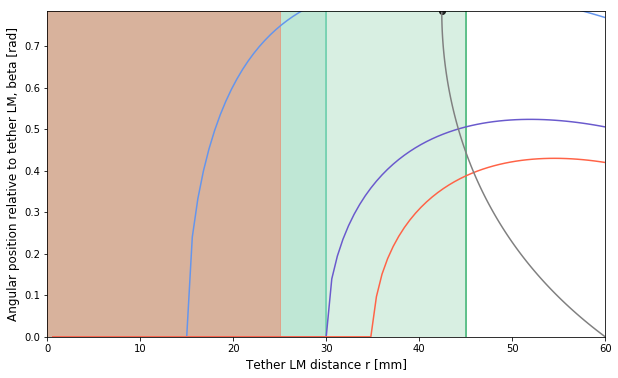

In [180]:
LMappearanceFig = plt.figure(figsize=(10,6))
LMappearancePlot = LMappearanceFig.add_subplot(111)

LMappearancePlot.axhline(y=0,linewidth=1,color='black', alpha=1) # fixation on tether LM

# visibility of tether LM
## fog
LMappearancePlot.add_patch(patches.Rectangle(
    (0, 0), minFog ,maxB, color='mediumaquamarine',alpha=0.2
))
LMappearancePlot.axvline(minFog, color='mediumaquamarine')

LMappearancePlot.add_patch( patches.Rectangle(
    (0, 0), maxFog, maxB, color='mediumseagreen',alpha=0.2
))
LMappearancePlot.axvline(maxFog, color='mediumseagreen')

# Reinforcement zone of tether LM
LMappearancePlot.add_patch(patches.Rectangle(
    (0, 0),   # (x,y)
    maxrR,          # width
    maxB,          # height
    color='tomato',
    alpha=0.4
))

# No fog and reinforcement zone around second LM
# cartesian: sqrt( (x-d)^2 + y^2 ) = R
# polar: r = sqrt( - (R^2 -d^2) - 2 d r cos(beta) )  <-> beta = acos[- [(R^2 -d^2 + r^2)/(2 d r)] ] 

npts = 100

r = np.linspace(maxDist/npts,maxDist,npts)
beta = np.linspace(0,maxB,npts)

beta_30 = np.arccos(np.clip(-((np.square(30) - np.square(maxDist) - np.square(r))/(2*maxDist*r)),0,1))
beta_45 = np.arccos(np.clip(-((np.square(45) - np.square(maxDist) - np.square(r))/(2*maxDist*r)),0,1))
beta_25 = np.arccos(np.clip(-((np.square(25) - np.square(maxDist) - np.square(r))/(2*maxDist*r)),0,1))

LMappearancePlot.plot(r, beta_30, color='slateblue')
LMappearancePlot.plot(r, beta_45, color='cornflowerblue')

LMappearancePlot.plot(r, beta_25, color='tomato')

# center of square formed by 4 LMs  
LMappearancePlot.plot(centerPt, np.pi/4, marker='o',color='black', alpha=0.8) 

# cut off of projection zone
r_zoneLim = (maxDist)/(np.cos(beta) + np.sin(beta))
LMappearancePlot.plot(r_zoneLim, beta, color='grey')


# Legend, labels
LMappearancePlot.set_xlabel('Tether LM distance r [mm]', fontsize=12)
LMappearancePlot.set_ylabel('Angular position relative to tether LM, beta [rad]', fontsize=12)

LMappearancePlot.set_xlim(0,maxDist)
LMappearancePlot.set_ylim(0,np.pi/4)

LMappearanceFig.savefig('2DLandmarkVisionMap.pdf')

## Interactive plot

In [49]:
from bokeh.io import output_notebook, push_notebook
from bokeh.layouts import widgetbox, row
from bokeh.models import CustomJS,Slider 
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_notebook()

Loading BokehJS ...

In [53]:
x=np.linspace(minDist,maxDist,(maxDist-minDist)*nPts)
y1=angleWidth(x)
y2=angleHeight(x)

vissource = ColumnDataSource(data=dict(x=x,y1=y1,y2=y2))

visplot = figure(y_range=(-10,180), x_range=(minDist, maxDist), plot_width=600,plot_height=400)

visplot.line('x','y1',source=vissource,line_width=2, color='black')
visplot.line('x','y2',source=vissource,line_width=2, color='grey')


callback = CustomJS(args=dict(source=vissource),code="""
    var data = source.data;
    var lmw = width.value;
    var lmh = height.value;
    
    x = data['x']
    y1 = data['y1']
    y2 = data['y2']
    
    for (i = 0; i < x.length; i++) {
        y1[i] = 180/Math.PI * 2*Math.atan((lmw/2.0)/x[i]);
        y2[i] = 180/Math.PI * Math.atan((lmh)/x[i]);
    }
    source.trigger('change');
""")

width_slider = Slider(start=0.5,end=20,value=10,step=0.5,title="Landmark width [mm]",callback=callback)
callback.args["width"] = width_slider

height_slider = Slider(start=1,end=60,value=40,step=1,title="Landmark height [mm]",callback=callback)
callback.args["height"] = height_slider

layout = row(
    visplot,
    widgetbox(width_slider, height_slider)
)

visplot.yaxis.axis_label = 'Angular size [deg]'
visplot.xaxis.axis_label = 'Landmark distance [mm]'

lohandle = show(layout, notebook_handle=True)
push_notebook(handle=lohandle)

#output_file('LandmarkSizePlot', title='Angular landmark size', mode='relative', root_dir=getcwd())

/Users/haberkernh/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/haberkernh/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
